# P0 - Experience with Pandas
## Author: Hunter Chambers
**Due: Sun. 9/20, 11:59pm**

Work with the Climate Data set available: http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt. Be sure to investigate and understand the data, format, and descriptions provided.

You should use the following libraries to complete this assignment:

In [38]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as matpat
%matplotlib inline

## 1. (8 pts) Get the Data

Read in the data from the link provided.  Make sure to use the same column names as given in the data (replacing ' ' with '_').
    
*Hint: Column names should be coded as `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Anomaly`.*



### 1A. Load the data

Write a function to load in the data to a DataFrame object, print the number of rows, columns, and data types of each column using a print statement.

In [39]:
# 1A
def p0_q1a(url, column_names=None, skip_row=None, separator=','):
    '''
    - Description - 
    Load data into an object and report number of rows and columns with a print statement.
    Addtionally, print the data types of each column
    Use pandas.read_csv(...):
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

    - Inputs - 
    url: location of dataset file, filepath_or_buffer
    column_names: list of column names to add to DataFrame (default is None), names
    skip_rows: number of header rows to skip in dataset file (default is None), skip_rows
    separator: delimiter to use (default is a comma), sep

    - Outputs - 
    df: return object is a DataFrame

    - Print Statements - 
    print("Number of Rows: ...")
    print("Number of Columns: ...")
    print("Column Data Types:")
    print(Data Types)
    '''
    ### BEGIN SOLUTION
    df = pd.read_csv(url, 
                sep=separator, 
                skiprows=skip_row, 
                names=column_names)

    # Getting to know the data
    print('The number of (rows, columns): ', df.shape)
    print()
    print('The data types of each column: ') 
    print(df.dtypes)
    ### END SOLUTION
    return df

### BEGIN SOLUTION
url = 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
column_names = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
link = 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
skip_rows = 23
separator = '\s+'
### END SOLUTION

climate = p0_q1a(url, column_names, skip_rows, separator)
climate

The number of (rows, columns):  (50769, 6)

The data types of each column: 
Date_Number    float64
Year             int64
Month            int64
Day              int64
Day_of_Year      int64
Anomaly        float64
dtype: object


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.786
1,1880.004,1880,1,2,2,-0.695
2,1880.007,1880,1,3,3,-0.783
3,1880.010,1880,1,4,4,-0.725
4,1880.012,1880,1,5,5,-0.802
...,...,...,...,...,...,...
50764,2018.988,2018,12,27,361,0.965
50765,2018.990,2018,12,28,362,0.765
50766,2018.993,2018,12,29,363,0.611
50767,2018.996,2018,12,30,364,0.636


### 1B. Understand the Data

What are the column names and what do they correspond to? *Use this Markdown cell to describe each succinctly (< 15 words per column)*


=== BEGIN MARK SCHEME ===

`Date_Number` is a continuous variable for date of an observation, where the year is a whole number plus a decimal approximation for day of year.  
`Year` is the year of an observation  
`Month` is the month of an observation  
`Day` is the day of the month of an observation   
`Day_of_Year` is the day of the year of an observation  
`Anomaly` is the temperature in Celsius reported as anomalies relative to the Jan 1951-Dec 1980 average* for each observation

=== END MARK SCHEME ===

## 2. (2 pts) Add to the Data

Add a new column to your DataFrame. The column `Temp` adds the anomaly information to the estimated average temp. 

In [40]:
# 2
### BEGIN SOLUTION
estimated_land_average_temp = 8.63
climate['Temp'] = climate['Anomaly'] + estimated_land_average_temp
### END SOLUTION

print(climate['Temp'].head())

0    7.844
1    7.935
2    7.847
3    7.905
4    7.828
Name: Temp, dtype: float64


## 3. (25 pts) Calculate and report statistics. 
Pandas DataFrames have several methods for manipulation, aggregation, and calculation of meaningful statistics. The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is very helpful to understand attributes and methods. Matplotlib [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) integrates well with both pandas DataFrames and numpy arrays for visualization tasks.

### 3A. Calculate the mean anomaly by year. 
Create an `Int64Index` of `years`, and an array of corresponding `mean_anomaly_year`. 
*Hint: Use methods like `.groupby()` and `.mean()` to get the proper data, then use the `.keys()` method to get an index, and `.values` for an array.*

In [41]:
# 3A
### BEGIN SOLUTION
years = pd.Int64Index(set(climate['Year'])) 
mean_anomaly_year = climate.groupby(['Year'])['Anomaly'].mean()
### END SOLUTION


print('Years index:\n', years)
print('Means array:\n', mean_anomaly_year)

Years index:
 Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', length=139)
Means array:
 Year
1880   -0.643131
1881   -0.421753
1882   -0.601252
1883   -0.712767
1884   -0.894311
          ...   
2014    0.947268
2015    1.216375
2016    1.382836
2017    1.279797
2018    1.143532
Name: Anomaly, Length: 139, dtype: float64


### 3B. Calculate the mean temp by year.
This is a similar task of creating an array.

In [42]:
# 3B
### BEGIN SOLUTION
mean_temp_year = climate.groupby('Year')['Temp'].mean()
### END SOLUTION

mean_temp_year

Year
1880     7.986869
1881     8.208247
1882     8.028748
1883     7.917233
1884     7.735689
          ...    
2014     9.577268
2015     9.846375
2016    10.012836
2017     9.909797
2018     9.773532
Name: Temp, Length: 139, dtype: float64

### 3C. Plot `mean_temp_year` by `years`.
Be sure to include a plot title, x-axis label, and y-axis label. 

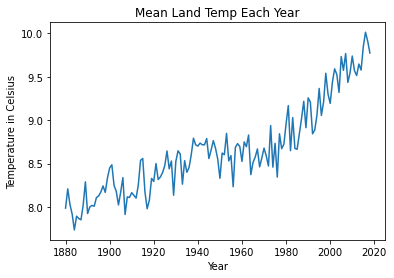

In [49]:
# 3C 
### BEGIN SOLUTION
plt.title('Mean Land Temp Each Year')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
plt.plot(mean_temp_year)
### END SOLUTION

### 3D. Calculate the mean anomaly by month and plot this using a bar chart.
First create an index of `months`, then an array of `mean_anomaly_month`. Be sure to include a plot title, x-axis label, y-axis label, and black horizontal zero line on the plot. This will help to visually reference positive and negative bars.

In [44]:
# 3D 
### BEGIN SOLUTION
months = list(set(climate['Month']))
mean_anomaly_month = climate.groupby('Month')['Anomaly'].mean()
### END SOLUTION

print('Months index:\n', months)
print('Anomalies array:\n', mean_anomaly_month)

Months index:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Anomalies array:
 Month
1    -0.040412
2    -0.021206
3     0.077806
4     0.240580
5     0.104938
6     0.047595
7     0.058652
8     0.005617
9    -0.035617
10    0.098093
11   -0.123620
12   -0.070192
Name: Anomaly, dtype: float64


<BarContainer object of 12 artists>

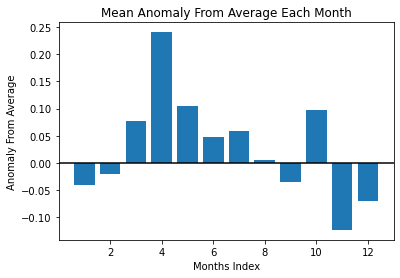

In [45]:
# 3D 
### BEGIN SOLUTION
plt.title('Mean Anomaly From Average Each Month')
plt.xlabel('Months Index')
plt.ylabel('Anomaly From Average')
plt.axhline(y=0, color='black', linestyle='-')
plt.bar(months, height=mean_anomaly_month)
### END SOLUTION

### 3E. Plot a histogram of the Anomaly data.
Be sure to include a plot title, x-axis label, and y-axis label.

(array([1., 1., 2., 1., 1., 1., 2., 2., 0., 0., 0., 1.]),
 array([-0.1236199 , -0.09326994, -0.06291998, -0.03257002, -0.00222006,
         0.0281299 ,  0.05847986,  0.08882982,  0.11917978,  0.14952974,
         0.1798797 ,  0.21022966,  0.24057962]),
 <BarContainer object of 12 artists>)

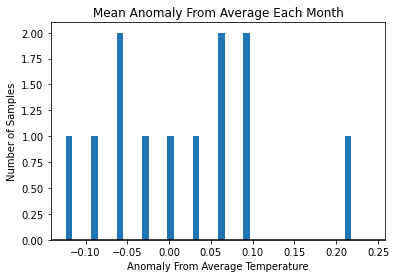

In [46]:
# 3E
### BEGIN SOLUTION
plt.title('Mean Anomaly From Average Each Month')
plt.xlabel('Anomaly From Average Temperature')
plt.ylabel('Number of Samples')
plt.axhline(y=0, color='black', linestyle='-')
plt.hist(mean_anomaly_month, bins = 12, width = 0.008)
### END SOLUTION

### 3F. Bonus 

#### (a) Recreate the plot from 3C and add a horizontal line at the estimated land-average temp. 


#### (b) Recreate the plot from 3D and color the positive bars in black and the negative bars in red.

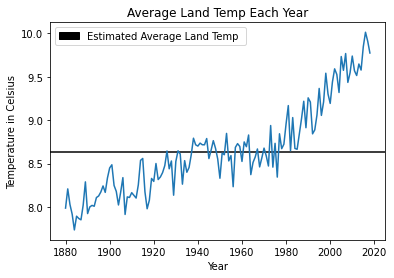

In [53]:
# 3F(a)
### BEGIN SOLUTION
plt.title('Average Land Temp Each Year')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
plt.axhline(y=estimated_land_average_temp, color='black', linestyle='-')
black_label = matpat.Patch(color='k', label='Estimated Average Land Temp ')
plt.legend(handles=[black_label])
plt.plot(mean_temp_year)
### END SOLUTION

<BarContainer object of 12 artists>

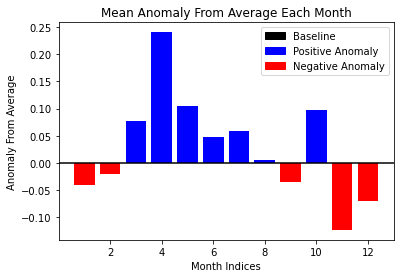

In [54]:
# 3F(b)

### SOURCES: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
###          https://stackoverflow.com/questions/33476401/color-matplotlib-bar-chart-based-on-value
###          https://matplotlib.org/3.3.1/tutorials/intermediate/legend_guide.html

### BEGIN SOLUTION
plt.title('Mean Anomaly From Average Each Month')
plt.xlabel('Month Indices')
plt.ylabel('Anomaly From Average')
plt.axhline(y=0, color='black', linestyle='-')

# Find the negative values
negative_anomaly = mean_anomaly_month < 0
# Make list of colors, default color is blue
colors = np.array(['b']*len(months))
# Change color to red where the list negative_anomaly == True
colors[negative_anomaly] = 'r'

black_label, blue_label, red_label = matpat.Patch(color='k', label='Baseline'), matpat.Patch(color='b', label='Positive Anomaly'), matpat.Patch(color='r', label='Negative Anomaly')
plt.legend(handles=[black_label, blue_label, red_label])
plt.bar(months, height=mean_anomaly_month, color=colors)
### END SOLUTION